In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded.keys())))

df['height'] = np.random.randint(150, 181, df.shape[0])
print(df.info())


Saving myexcel - myexcel.csv.csv to myexcel - myexcel.csv.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB
None


Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64


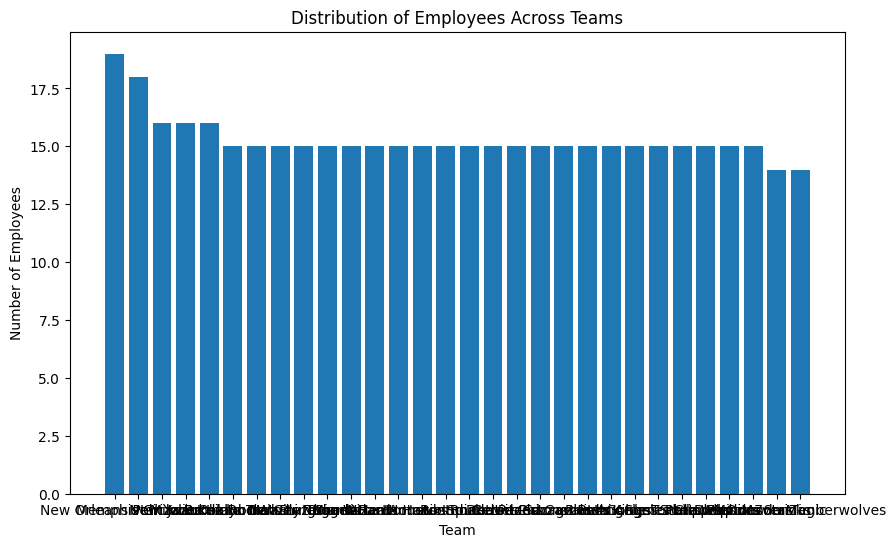

In [11]:
#1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.
td = df['Team'].value_counts()
tp = (td / df.shape[0]) * 100
print(td)
plt.figure(figsize=(10, 6))
plt.bar(td.index, td.values)
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()

#team New Orleans Pelicans has most number of employees and its 19.most of the team have 15 members.

Position Distribution:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


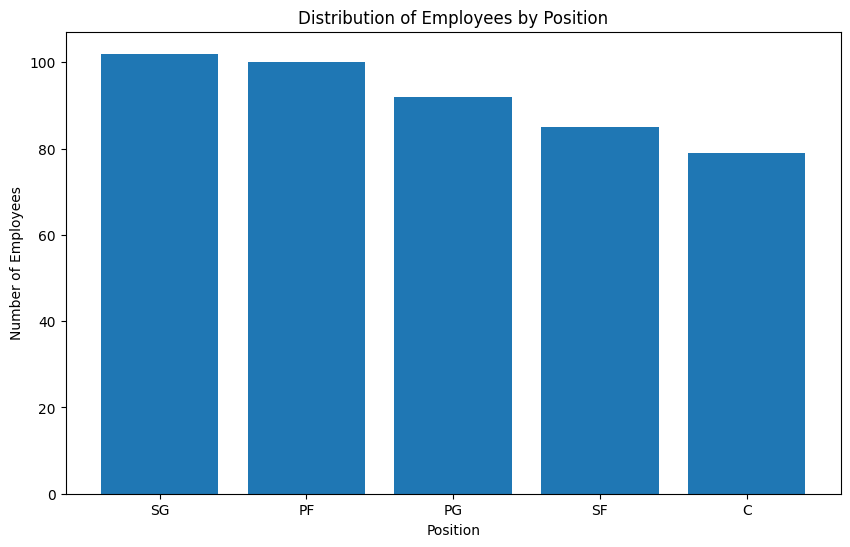

In [6]:
#2.Segregate employees based on their positions within the company
pd = df['Position'].value_counts()
print("Position Distribution:")
print(pd)

plt.figure(figsize=(10, 6))
plt.bar(pd.index, pd.values)
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.show()

#most employess are in position SG.the order is SG>PF>PG>SF>C and C position have have only 79 employees

Age Group Distribution:
age_group
20-30    334
30-40    119
40-50      3
50-60      0
Name: count, dtype: int64


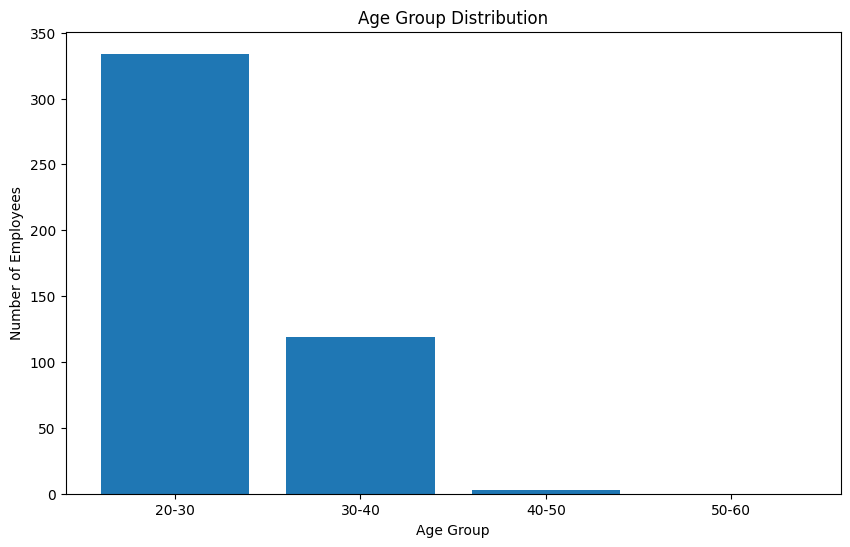

In [7]:
# 3. Identify the predominant age group among employees

bins = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
ad = df['age_group'].value_counts()
print("Age Group Distribution:")
print(ad)

plt.figure(figsize=(10, 6))
plt.bar(ad.index.astype(str), ad.values)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

#the predominant age group is 20-30 with 334 employees.that is most are young people.there are no employees above age 50.

Salary Expenditure by Team:
Team
Atlanta Hawks              72902950.0
Boston Celtics             58541068.0
Brooklyn Nets              52528475.0
Charlotte Hornets          78340920.0
Chicago Bulls              86783378.0
Cleveland Cavaliers       106988689.0
Dallas Mavericks           71198732.0
Denver Nuggets             60121930.0
Detroit Pistons            67168263.0
Golden State Warriors      88868997.0
Houston Rockets            75283021.0
Indiana Pacers             66751826.0
Los Angeles Clippers       94854640.0
Los Angeles Lakers         71770431.0
Memphis Grizzlies          76550880.0
Miami Heat                 82515673.0
Milwaukee Bucks            69603517.0
Minnesota Timberwolves     59709697.0
New Orleans Pelicans       82750774.0
New York Knicks            73303898.0
Oklahoma City Thunder      93765298.0
Orlando Magic              60161470.0
Philadelphia 76ers         30992894.0
Phoenix Suns               63445135.0
Portland Trail Blazers     48301818.0
Sacramento Kings 

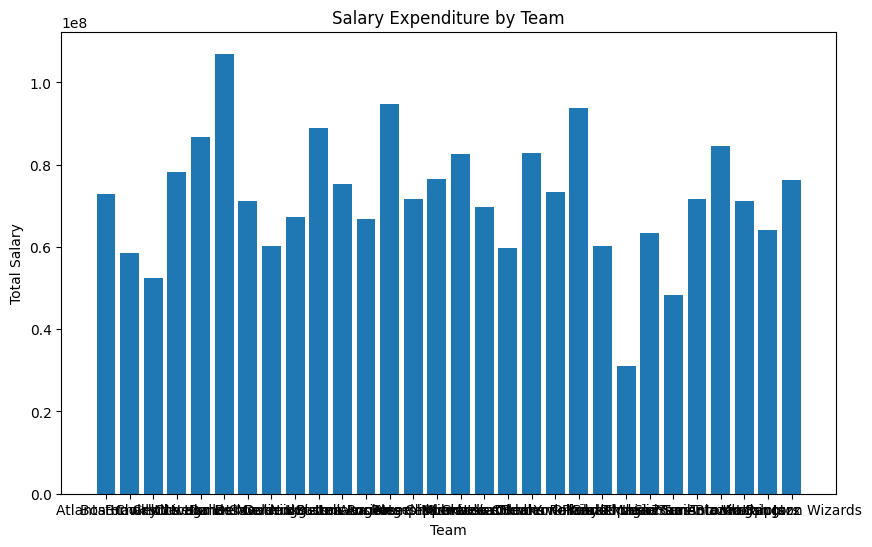

Salary Expenditure by Position:
Position
C     466377332.0
PF    442560850.0
PG    446848971.0
SF    408020976.0
SG    396976258.0
Name: Salary, dtype: float64


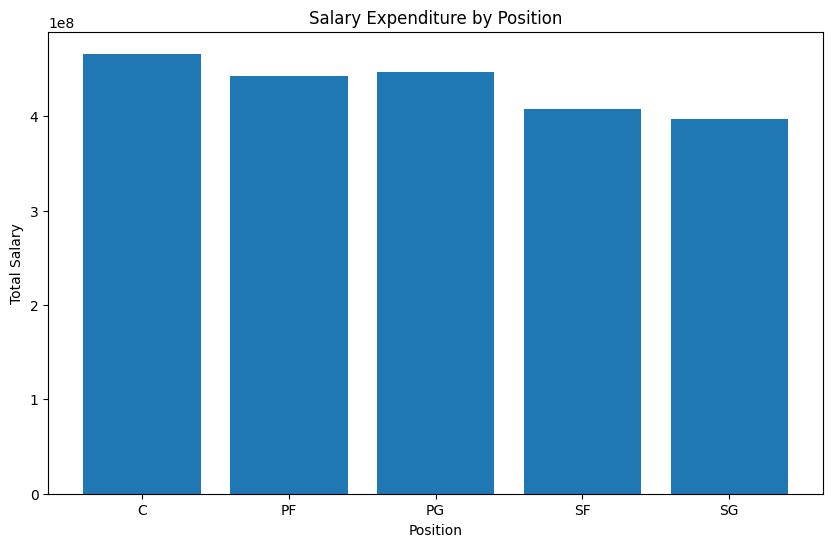

In [9]:
# 4. Discover which team and position have the highest salary expenditure
ts = df.groupby('Team')['Salary'].sum()
print("Salary Expenditure by Team:")
print(ts)

plt.figure(figsize=(10, 6))
plt.bar(ts.index, ts.values)
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.show()

ps = df.groupby('Position')['Salary'].sum()
print("Salary Expenditure by Position:")
print(ps)

plt.figure(figsize=(10, 6))
plt.bar(ps.index, ps.values)
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.show()

#team atlanta hawks has highest salary and employees in position c is having most salary.

Correlation between Age and Salary:
             Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


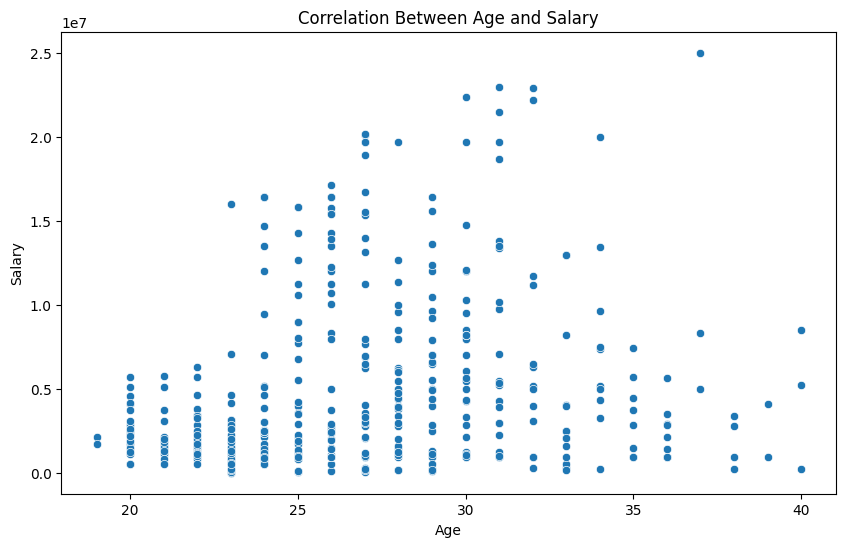

In [10]:
# 5.  Investigate if there's any correlation between age and salary, and represent it visually.
correlation = df[['Age', 'Salary']].corr()
print("Correlation between Age and Salary:")
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
#in this correlation between age and salary ,it shws that initially as age increases salary also increase till age reaches between 30-35 and after that there is a trend in decrease of salary as the age increase..